In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [2]:
data = pd.read_csv('diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
data.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

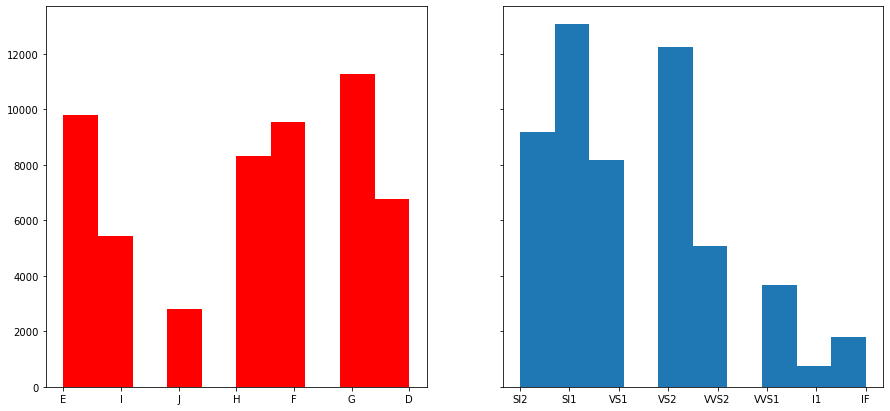

In [34]:

fig,axs = plt.subplots(1, 2, sharey=True,figsize=(15, 7))

axs[0].hist(data.color,bins=10,color='red')
axs[1].hist(data.clarity,bins=10)

plt.show()

<AxesSubplot:ylabel='Frequency'>

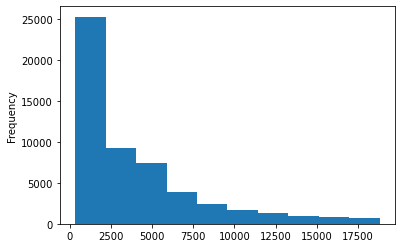

In [41]:
data.price.plot.hist(bins=10)

In [46]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [48]:
data.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

<BarContainer object of 53940 artists>

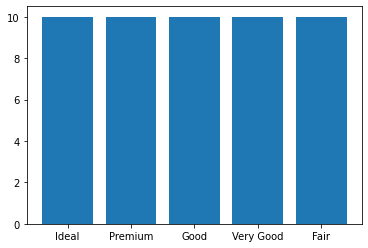

In [51]:
plt.bar(data.cut,height=10)

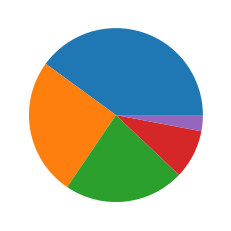

In [59]:
plt.pie(data.cut.value_counts())
plt.show()

In [61]:
plt.scatter(data.cut)

TypeError: scatter() missing 1 required positional argument: 'y'

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

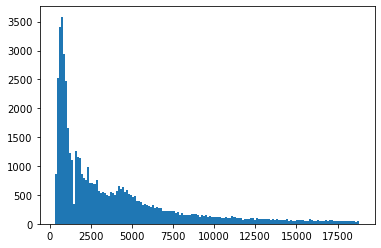

In [64]:
plt.hist(data.price,bins=150)
plt.plot

In [67]:
groupdata = data.groupby('cut').count()
groupdata

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082


In [69]:
x_vals = []
y_vals = []
for i in [0, 1, 4, 3, 2]: 
    # The elements in the list are arranged in increasing order of the quality of cut. 
    # This information can be gathered from the data dictionary.  
    x_vals.append(groupdata.index[i])
    y_vals.append(groupdata.iloc[i,0])
y_vals    

[1610, 4906, 12082, 13791, 21551]

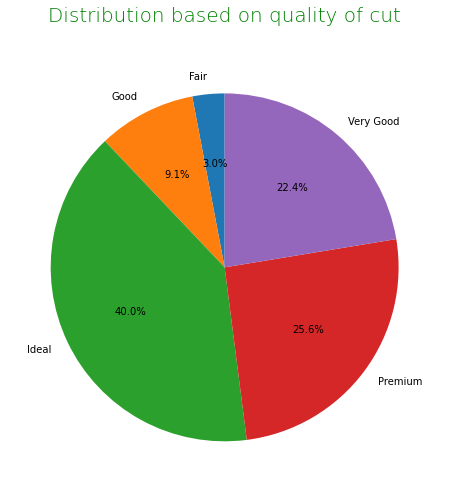

In [77]:
plt.figure(figsize=(8,8))
plt.pie(groupdata.carat,startangle=90,labels=groupdata.index,autopct='%1.1f%%',)
plt.title("Distribution based on quality of cut\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

plt.show()